In [1]:
import random
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
d1=[]
d2=[]
d3=[]
d4=[]
for i in range(50000):
    x=random.random()
    d1.append(x)
    y=random.random()
    d2.append(y)
    z=random.random()
    d3.append(z)
    d4.append(2*x+3*y+z)

In [3]:
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3,'x4':d4},index=range(0,50000))

In [4]:
df

,x1,x2,x3,x4
0,0.153884,0.171358,0.161096,0.982937
1,0.207754,0.907258,0.116049,3.253330
2,0.968818,0.205686,0.703790,3.258482
3,0.296709,0.526394,0.622272,2.794872
4,0.822579,0.243627,0.637837,3.013875
...,...,...,...,...
49995,0.304229,0.429601,0.931123,2.828384
49996,0.304617,0.652803,0.241579,2.809222
49997,0.809167,0.726646,0.360557,4.158830
49998,0.891716,0.681459,0.538339,4.366148


In [5]:
import random

# Generate random data
d1 = [random.random() for _ in range(50000)]
d2 = [random.random() for _ in range(50000)]
d3 = [random.random() for _ in range(50000)]
d4 = [2 * x + 3 * y + z for x, y, z in zip(d1, d2, d3)]

# Create DataFrame
df = pd.DataFrame({'x1': d1, 'x2': d2, 'x3': d3, 'x4': d4})

# Define bin edges and labels
bins = [df["x4"].min(), df["x4"].quantile(0.50),df["x4"].max()]
labels = ["Low", "High"]

# Create x5 column with bins
df["x5"] = pd.cut(df["x4"], bins=bins, labels=labels, include_lowest=True)

# Display first few rows
print(df.head())

         x1        x2        x3        x4    x5
0  0.989174  0.214017  0.198643  2.819043   Low
1  0.314174  0.763346  0.952643  3.871028  High
2  0.219778  0.772589  0.979801  3.737123  High
3  0.442234  0.476098  0.568880  2.881642   Low
4  0.794655  0.682047  0.399154  4.034603  High


In [6]:
df["x5_encoded"] = df["x5"].map({"Low": -1, "High": 1})

In [7]:
df["x5_encoded"] = df["x5_encoded"].astype(int)

In [8]:
X = df.iloc[:,0:3]
Y = df.iloc[:,5]

In [9]:
X

,x1,x2,x3
0,0.989174,0.214017,0.198643
1,0.314174,0.763346,0.952643
2,0.219778,0.772589,0.979801
3,0.442234,0.476098,0.568880
4,0.794655,0.682047,0.399154
...,...,...,...
49995,0.408647,0.919391,0.219290
49996,0.437341,0.852733,0.741778
49997,0.134431,0.268192,0.178911
49998,0.137059,0.136764,0.482578


In [10]:
Y

0       -1
1        1
2        1
3       -1
4        1
        ..
49995    1
49996    1
49997   -1
49998   -1
49999   -1
Name: x5_encoded, Length: 50000, dtype: int32

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [12]:
df.head()

,x1,x2,x3,x4,x5,x5_encoded
0,0.989174,0.214017,0.198643,2.819043,Low,-1
1,0.314174,0.763346,0.952643,3.871028,High,1
2,0.219778,0.772589,0.979801,3.737123,High,1
3,0.442234,0.476098,0.568880,2.881642,Low,-1
4,0.794655,0.682047,0.399154,4.034603,High,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
X_train

,x1,x2,x3
14777,0.124182,0.834371,0.614580
3240,0.993931,0.399074,0.689664
23546,0.437700,0.469460,0.001359
29205,0.719155,0.237499,0.102350
4202,0.948721,0.804054,0.511264
...,...,...,...
45035,0.732618,0.498403,0.739789
6414,0.466208,0.919337,0.166993
18679,0.191636,0.225093,0.106129
6964,0.386454,0.303481,0.700139


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')  # 3 output classes: -1, 0, 1
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])

In [16]:
h1=model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5064 - loss: -0.6446
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5046 - loss: -34.5626
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5084 - loss: -171.4567
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5028 - loss: -458.6705
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5058 - loss: -890.7260
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4999 - loss: -1534.8254
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5022 - loss: -2356.9644
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5060 - loss: -3382.7407
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5050 - loss: -4650.2261
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5064 - loss: -6189.1201
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4995 - loss: -8213

In [17]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
from sklearn.metrics import r2_score,accuracy_score

In [19]:
accuracy_score(y_pred, y_test)

0.484

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

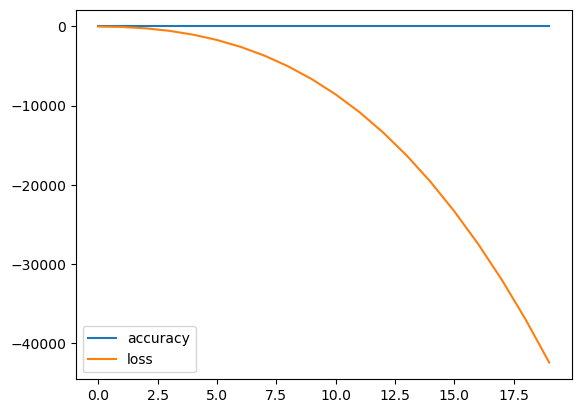

In [21]:
metrics_df = pd.DataFrame(h1.history)
metrics_df.plot()
plt.show()